In [ ]:
"""
METHODS
    NeuralNet(nn.Module) : the class which Net innherits
    - def forward(): 

"""

In [1]:
import torch 
import torch.nn as nn
import torchvision 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 


In [2]:
# device config 
device = torch.device (
    'cuda' if torch.cuda.is_available() else 'cpu'
)

# hyper parameters 
input_size = 784 # 28*28 is the size of images, and of course the array is going to be flattened 
hidden_size = 100 
num_classes = 10 # 0 -> 9 
num_epochs = 2
batch_size =100
learning_rate = 0.001


# MNIST 

# test dataset
training_dataset = torchvision.datasets.MNIST(
    root='./data', 
    train = True, 
    transform=transforms.ToTensor(), 
    download=True
)

# test dataset
test_dataset = torchvision.datasets.MNIST(
    root='./data', 
    train = False, 
    transform=transforms.ToTensor(), 
    # download=True
)


train_loader = torch.utils.data.DataLoader(
    dataset=training_dataset, # gotta have len() and __init__() and __getiitem__()
    batch_size=batch_size, 
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=training_dataset, 
    batch_size=batch_size, 
    shuffle=False
)


examples = iter(train_loader)
test_examples = iter(test_loader)

test_samples, test_labels = next(examples)
samples, labels = next(examples)


print('Type of training_dataset : ', type(training_dataset))
print()

print('samples.shape : ', samples.shape)
print('labels.shape: ', labels.shape)
print()

print('len of train loader : ', len(train_loader))
print('len of test loader : ', len(test_loader))
print()




Type of training_dataset :  <class 'torchvision.datasets.mnist.MNIST'>

samples.shape :  torch.Size([100, 1, 28, 28])
labels.shape:  torch.Size([100])

len of train loader :  600
len of test loader :  600



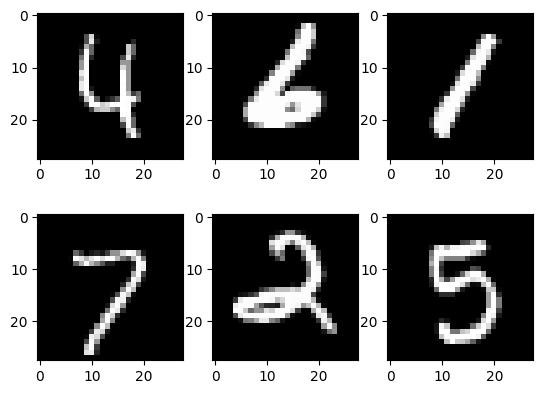

In [41]:
for i in range(6): 
    plt.subplot(2,3, i+1) # 2 rows of 3 clomuns
    plt.imshow(samples[i][0], cmap='gray') # output the first chane


In [26]:
class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out


model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):

    # loop over batches 
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()

        # update params 
        optimizer.step()
        
        # print progress and metrics 
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

        

Epoch [1/2], Step [100/600], Loss: 0.3923
Epoch [1/2], Step [200/600], Loss: 0.4844
Epoch [1/2], Step [300/600], Loss: 0.3677
Epoch [1/2], Step [400/600], Loss: 0.3015
Epoch [1/2], Step [500/600], Loss: 0.1847
Epoch [1/2], Step [600/600], Loss: 0.2321
Epoch [2/2], Step [100/600], Loss: 0.1880
Epoch [2/2], Step [200/600], Loss: 0.2556
Epoch [2/2], Step [300/600], Loss: 0.2436
Epoch [2/2], Step [400/600], Loss: 0.3013
Epoch [2/2], Step [500/600], Loss: 0.1167
Epoch [2/2], Step [600/600], Loss: 0.1810


In [30]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0

    count = 0

    # tested, this loops over the batches 
    for images, labels in test_loader:

       
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # this one returns one hot encoded  of everything in the batch 
        outputs = model(images)

        # DEBUG: for me 
        if count == 0: 
            print('outputs[0]: ', outputs[0])

        count += 1 

        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')



outputs[0]:  tensor([ -2.5045,  -4.6012,  -1.2761,   3.9484, -14.5096,   7.4062,  -9.0100,
         -1.7753,  -6.0947,  -4.4831])
Accuracy of the network on the 10000 test images: 95.48833333333333 %
